# LABORATORIO 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### SEPARACION DE DATOS

In [2]:
x = np.genfromtxt('/Users/maria/OneDrive/Documentos/mle/satgpa.csv',delimiter=',',skip_header=1)
y = np.array([x[:,5]]).T
X = x[:,[0,3,4]]
m,n = X.shape
unos = np.ones((m,1))
X = np.concatenate((unos,X), axis = 1)
X

array([[  1.  ,   1.  , 127.  ,   3.4 ],
       [  1.  ,   2.  , 122.  ,   4.  ],
       [  1.  ,   2.  , 116.  ,   3.75],
       ...,
       [  1.  ,   1.  , 114.  ,   3.5 ],
       [  1.  ,   1.  , 120.  ,   2.3 ],
       [  1.  ,   1.  ,  93.  ,   2.7 ]])

[1, 4, 0, 4.5]

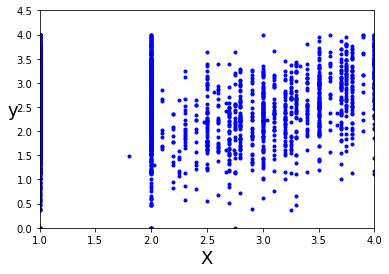

In [3]:
plt.plot(X,y,'b.')
plt.xlabel('X', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.axis([1,4,0,4.5])

In [4]:
theta_0 = np.random.rand(n+1, 1)

### FUNCIONES DE GRADIENTE

In [5]:
def linear_cost(X, y, theta):
    h = X @ theta
    return ((y - h) ** 2).sum() / (2 * len(x))

In [6]:
def linear_cost_gradient(X, y, theta):
    h = X @ theta
    return ((h - y).T @ X).T / len(x)

In [7]:
def gradient_descent(
    X,
    y,
    theta_0,
    cost_function,
    cost_function_gradient,
    learning_rate = 0.0001,
    threshold = 0.01,
    max_iter = 1000
):
    theta = theta_0
    iteration = 0
    costs = []
    
    while np.linalg.norm(cost_function_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        theta = theta - (learning_rate * cost_function_gradient(X, y, theta))
        costs.append(cost_function(X, y, theta))
        
    return theta, costs


## RESULTADOS

## MODELO 1: 
Con un learning rate de 0.000001 y threshold de 100 el modelo baja bastante en costos pero se mantiene en un minimo de 0.668.

In [8]:
t, c = gradient_descent(X,y,theta_0,linear_cost,linear_cost_gradient,learning_rate = 0.000001,threshold = 100,max_iter = 1000)

In [9]:
print('RESULTADOS \nTheta 0:          {:0.3f},\nTheta 1:          {:0.3f}, \nTheta 2:          {:0.3f},\nTheta 3:          {:0.3f}'.format(t[0][0],t[1][0],t[2][0],t[3][0]))
print('X1 = sex,   X2 = sat_sum,   X3 = hs_gpa')
print('Ecuacion lineal de notas: {:0.3f} + {:0.3f} X1 + {:0.3f} X2 + {:0.3f} X3'.format(t[0][0],t[1][0],t[2][0],t[3][0]))
print('Minimo:  {:0.3f}'.format(c[-1]))


RESULTADOS 
Theta 0:          0.618,
Theta 1:          0.052, 
Theta 2:          0.003,
Theta 3:          0.761
X1 = sex,   X2 = sat_sum,   X3 = hs_gpa
Ecuacion lineal de notas: 0.618 + 0.052 X1 + 0.003 X2 + 0.761 X3
Minimo:  0.668


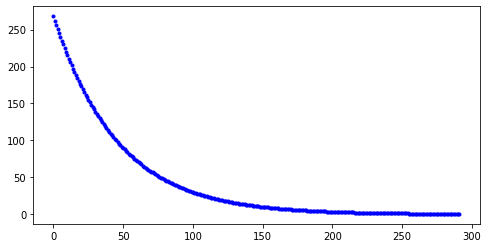

In [11]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(292),c,'b.')

## MODELO 2: 
Con un learning rate de 0.000001 y threshold de 10 el modelo baja a un minimo de 0.217. Este es casi el punto minimo del gradiet descent ya que aun reduciendo el threshold no baja mas alla de 0.2. 

Por ende, para obtener un modelo optimizador se tiene que usar un threshold bajo. En los graficos de minimizacion de costos se puede ver como el segundo se aplana mucho mas.

In [12]:
t, c = gradient_descent(X,y,theta_0,linear_cost,linear_cost_gradient,learning_rate = 0.000001,threshold = 10,max_iter = 1000)

In [13]:
print('RESULTADOS \nTheta 0:          {:0.3f},\nTheta 1:          {:0.3f}, \nTheta 2:          {:0.3f},\nTheta 3:          {:0.3f}'.format(t[0][0],t[1][0],t[2][0],t[3][0]))
print('X1 = sex,   X2 = sat_sum,   X3 = hs_gpa')
print('Ecuacion lineal de notas: {:0.3f} + {:0.3f} X1 + {:0.3f} X2 + {:0.3f} X3'.format(t[0][0],t[1][0],t[2][0],t[3][0]))
print('Minimo:  {:0.3f}'.format(c[-1]))

RESULTADOS 
Theta 0:          0.617,
Theta 1:          0.052, 
Theta 2:          -0.005,
Theta 3:          0.760
X1 = sex,   X2 = sat_sum,   X3 = hs_gpa
Ecuacion lineal de notas: 0.617 + 0.052 X1 + -0.005 X2 + 0.760 X3
Minimo:  0.217


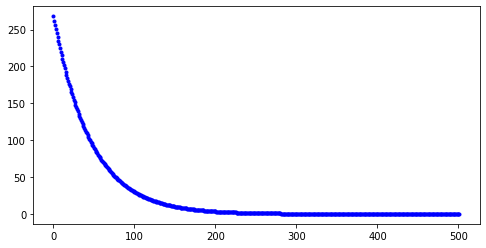

In [15]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(502),c,'b.')